# Цели и задачи проекта

# Первичный анализ данных
Импортируем библиотеки и прочитаем файл с данными:

In [1]:
import pandas as pd
import numpy as np
from math import nan
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

df = pd.read_csv('stud_math.csv')

df.columns = [col.lower() for col in df.columns]

Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов:

In [2]:
display(df.head(20))
df.info() 

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   pstatus              350 non-null    object 
 6   medu                 392 non-null    float64
 7   fedu                 371 non-null    float64
 8   mjob                 376 non-null    object 
 9   fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Итого 395 строк (в значениях большинства колонок есть пропуски), 30 столбцов. В датасете 13 числовых столбцов, 17 строковых.

# Функции для работы со столбцами

In [3]:
def get_absence_number(col):
    return (col.isnull() | col.isna()).sum()


def check_discrete_values(col, list_values):
    col_err = col[~col.isin(list_values) & ~col.isnull()]
    if col_err.size == 0:
        print('Данные корректны.')
    else:
        print('Данные не корректны:', col_err.value_counts())


def check_continuous_values(col, list_borders):
    list_borders.sort()
    col_err = col[(col < list_borders[0]) | (col > list_borders[1]) & ~col.isnull()]
    if col_err.size == 0:
        print('Данные корректны.')
    else:
        print('Данные не корректны:', col_err.value_counts())


# col.replace(40, 4, inplace=True)


def remove_value(df, col_name, value):
    if (not pd.isnull(value)) and (not pd.isna(value)):
        return df[df[col_name] != value]
    else:
        return df[~(df[col_name].isnull() | df[col_name].isna())]


def get_percentiles(col):
    list_quant = [col.quantile(0.25), col.quantile(0.75)]
    iqr = list_quant[1] - list_quant[0]
    diap = [list_quant[0] - 1.5*iqr, list_quant[1] + 1.5*iqr]
    return [list_quant, diap, iqr]


def print_column_info(col):
    display(col.value_counts())
    display(sum(col.value_counts().values))
    print(f'Количество пропусков: {get_absence_number(col)}')
    print(f'Количество уникальных значений: {col.nunique()}')
    print(f'Количество значений, встретившихся более 10 раз: {(col.value_counts()>10).sum()}')


def print_column_hist(col, list_borders):
    display(col.describe())
    list_perc = get_percentiles(col)
    print(f'25-й перцентиль: {list_perc[0][0]},', f'75-й перцентиль: {list_perc[0][1]}',
          f'\nIQR: {list_perc[-1]},', f'Границы выбросов: [{list_perc[1][0]}, {list_perc[1][1]}].')
    # col.hist(bins=8, range=list_borders, label='IQR')
    list_borders_plot = (list_borders[0] - 2, list_borders[1] + 2)
    col.loc[col.between(list_borders[0], list_borders[1])].hist(alpha=0.5,
                                                                #bins=10,
                                                                range=list_borders_plot,
                                                                label='Здравый смысл')
    col.loc[col.between(list_perc[1][0], list_perc[1][1])].hist(#bins=10,
                                                                range=list_borders_plot,
                                                                label='IQR')
    plt.legend()
    
    
    


# 1. School — аббревиатура школы

In [4]:
col_name = 'school'
print_column_info(df[col_name])

GP    349
MS     46
Name: school, dtype: int64

395

Количество пропусков: 0
Количество уникальных значений: 2
Количество значений, встретившихся более 10 раз: 2


В данной колонке нет пропусков и некорректных значений, данные приведены для 2х различных школ (преобладает школа GP).
Является номинативной переменной, пригодной для дальнейшего анализа без дополнительных действий.

# 2. Sex — пол ('F' - женский, 'M' - мужской)
Так как заданы 2 возможных значения номинативной переменной 'sex', проверим данные в колонке на корректность значений.

In [5]:
col_name = 'sex'
check_discrete_values(df[col_name], ('F', 'M'))
print_column_info(df[col_name])

Данные корректны.


F    208
M    187
Name: sex, dtype: int64

395

Количество пропусков: 0
Количество уникальных значений: 2
Количество значений, встретившихся более 10 раз: 2


В данных колонки нет пропусков и некорректных значений, поэтому они пригодны для дальнейшего анализа. Можно заметить, что все ученики распределены по полу примерно поровну (девочек немного больше).

# 3. Age — возраст (от 15 до 22)
Вначале проверим данные по возрасту на корректность значений.

In [6]:
col_name = 'age'
check_discrete_values(df[col_name], range(15,23))
print_column_info(df[col_name])

Данные корректны.


16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

395

Количество пропусков: 0
Количество уникальных значений: 8
Количество значений, встретившихся более 10 раз: 5


В колонке нет пропусков и некорректных значений, всего 8 уникальных значений возраста в виде целого числа полных лет.
Построим распределение этого числового признака.

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

25-й перцентиль: 16.0, 75-й перцентиль: 18.0 
IQR: 2.0, Границы выбросов: [13.0, 21.0].


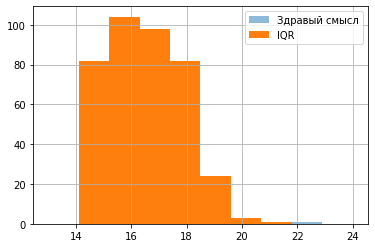

In [7]:
print_column_hist(df[col_name], (15,22))

У признака приблизительно нормальное распределение (форма гистограммы, среднее близко к медиане). Распределение смещено в сторону возрастов 16-19. Если пользоваться критерием интерквартильного расстояния, то значения выше 21 являются выбросами (1 значение в колонке). С другой стороны, переменная возраста может принимать значения от 15 до 22, поэтому нет необходимости устранять этот выброс. Данные в колонке пригодны для дальнейшего анализа.

# 4. Address — тип адреса ('U' - городской, 'R' - за городом)
Проверим данные на корректность значений.

In [8]:
col_name = 'address'
check_discrete_values(df[col_name], ('U', 'R'))
print_column_info(df[col_name])

Данные корректны.


U    295
R     83
Name: address, dtype: int64

378

Количество пропусков: 17
Количество уникальных значений: 2
Количество значений, встретившихся более 10 раз: 2


In [9]:
df1 = df[df['school'] == 'GP']
df2 = df[df['school'] == 'MS']

print_column_info(df1[col_name])
print_column_info(df2[col_name])

U    277
R     60
Name: address, dtype: int64

337

Количество пропусков: 12
Количество уникальных значений: 2
Количество значений, встретившихся более 10 раз: 2


R    23
U    18
Name: address, dtype: int64

41

Количество пропусков: 5
Количество уникальных значений: 2
Количество значений, встретившихся более 10 раз: 2


# 5. Famsize — размер семьи ('LE3' <= 3, 'GT3' > 3)
Проверим данные на корректность значений.

In [10]:
col_name = 'famsize'
check_discrete_values(df[col_name], ('LE3', 'GT3'))
print_column_info(df[col_name])

Данные корректны.


GT3    261
LE3    107
Name: famsize, dtype: int64

368

Количество пропусков: 27
Количество уникальных значений: 2
Количество значений, встретившихся более 10 раз: 2


# 6. Pstatus — статус совместного жилья родителей ('T' - живут вместе, 'A' - раздельно)
Проверим данные на корректность значений.

In [11]:
col_name = 'pstatus'
check_discrete_values(df[col_name], ('T', 'A'))
print_column_info(df[col_name])

Данные корректны.


T    314
A     36
Name: pstatus, dtype: int64

350

Количество пропусков: 45
Количество уникальных значений: 2
Количество значений, встретившихся более 10 раз: 2


In [12]:
col = df[df[col_name].isnull()]
# display(col)

# 7. Medu — образование матери (0 - 4)
Проверим данные на корректность значений.

In [13]:
col_name = 'medu'
check_discrete_values(df[col_name], range(5))
print_column_info(df[col_name])

Данные корректны.


4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: medu, dtype: int64

392

Количество пропусков: 3
Количество уникальных значений: 5
Количество значений, встретившихся более 10 раз: 4


In [14]:
col = df[df[col_name].isnull()]
# display(col)

# 8. Fedu — образование отца (0 - 4)
Проверим данные на корректность значений.

In [15]:
col_name = 'fedu'
check_discrete_values(df[col_name], range(5))

print_column_info(df[col_name])

Данные не корректны: 40.0    1
Name: fedu, dtype: int64


2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: fedu, dtype: int64

371

Количество пропусков: 24
Количество уникальных значений: 6
Количество значений, встретившихся более 10 раз: 4


In [16]:
df[col_name].replace(40, 4, inplace=True)
check_discrete_values(df[col_name], range(5))

print_column_info(df[col_name])

Данные корректны.


2.0    106
3.0     96
4.0     89
1.0     78
0.0      2
Name: fedu, dtype: int64

371

Количество пропусков: 24
Количество уникальных значений: 5
Количество значений, встретившихся более 10 раз: 4


In [17]:
df1 = df[df[col_name].isnull()]
# display(df1)

# 9. Mjob — работа матери ('teacher', 'health', 'services', 'at_home', 'other') 

In [18]:
col_name = 'mjob'
check_discrete_values(df[col_name], ('teacher','health','services','at_home','other'))
print_column_info(df[col_name])

Данные корректны.


other       133
services     98
at_home      58
teacher      55
health       32
Name: mjob, dtype: int64

376

Количество пропусков: 19
Количество уникальных значений: 5
Количество значений, встретившихся более 10 раз: 5


# 10. Fjob — работа отца ('teacher', 'health', 'services', 'at_home', 'other') 

In [19]:
col_name = 'fjob'
check_discrete_values(df[col_name], ('teacher','health','services','at_home','other'))
print_column_info(df[col_name])

Данные корректны.


other       197
services    102
teacher      29
at_home      16
health       15
Name: fjob, dtype: int64

359

Количество пропусков: 36
Количество уникальных значений: 5
Количество значений, встретившихся более 10 раз: 5


# 11. Reason — причина выбора школы ('home', 'reputation', 'course', 'other')

In [20]:
col_name = 'reason'
check_discrete_values(df[col_name], ('home','reputation','course','other'))
print_column_info(df[col_name])

Данные корректны.


course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

378

Количество пропусков: 17
Количество уникальных значений: 4
Количество значений, встретившихся более 10 раз: 4


# 12. Guardian — опекун ('mother', 'father', 'other')

In [21]:
col_name = 'guardian'
check_discrete_values(df[col_name], ('mother','father','other'))
print_column_info(df[col_name])

Данные корректны.


mother    250
father     86
other      28
Name: guardian, dtype: int64

364

Количество пропусков: 31
Количество уникальных значений: 3
Количество значений, встретившихся более 10 раз: 3


# 13. Traveltime — время в пути до школы (1 - 4)

In [22]:
col_name = 'traveltime'
check_discrete_values(df[col_name], range(1,5))
print_column_info(df[col_name])

Данные корректны.


1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

367

Количество пропусков: 28
Количество уникальных значений: 4
Количество значений, встретившихся более 10 раз: 3


# 14. Studytime — время на учёбу помимо школы в неделю (1 - 4)

In [23]:
col_name = 'studytime'
check_discrete_values(df[col_name], range(1,5))
print_column_info(df[col_name])

Данные корректны.


2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

388

Количество пропусков: 7
Количество уникальных значений: 4
Количество значений, встретившихся более 10 раз: 4


# 15. Failures — количество внеучебных неудач (0 - 3) ????????

In [24]:
col_name = 'failures'
check_discrete_values(df[col_name], range(4))
print_column_info(df[col_name])

Данные корректны.


0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

373

Количество пропусков: 22
Количество уникальных значений: 4
Количество значений, встретившихся более 10 раз: 4


# 16. Schoolsup — дополнительная образовательная поддержка (yes, no)

In [25]:
col_name = 'schoolsup'
check_discrete_values(df[col_name], ('yes', 'no'))
print_column_info(df[col_name])

Данные корректны.


no     335
yes     51
Name: schoolsup, dtype: int64

386

Количество пропусков: 9
Количество уникальных значений: 2
Количество значений, встретившихся более 10 раз: 2


# 17. Famsup — семейная образовательная поддержка (yes, no)

In [26]:
col_name = 'famsup'
check_discrete_values(df[col_name], ('yes', 'no'))
print_column_info(df[col_name])

Данные корректны.


yes    219
no     137
Name: famsup, dtype: int64

356

Количество пропусков: 39
Количество уникальных значений: 2
Количество значений, встретившихся более 10 раз: 2


# 18. Paid — дополнительные платные занятия по математике (yes, no)

In [27]:
col_name = 'paid'
check_discrete_values(df[col_name], ('yes', 'no'))
print_column_info(df[col_name])

Данные корректны.


no     200
yes    155
Name: paid, dtype: int64

355

Количество пропусков: 40
Количество уникальных значений: 2
Количество значений, встретившихся более 10 раз: 2


In [29]:
# display(df[df[col_name].isnull()])

# 19. Activities — дополнительные внеучебные занятия (yes, no)

In [30]:
col_name = 'activities'
check_discrete_values(df[col_name], ('yes', 'no'))
print_column_info(df[col_name])

Данные корректны.


yes    195
no     186
Name: activities, dtype: int64

381

Количество пропусков: 14
Количество уникальных значений: 2
Количество значений, встретившихся более 10 раз: 2


# 20. Nursery — посещал детский сад (yes, no)

In [31]:
col_name = 'nursery'
check_discrete_values(df[col_name], ('yes', 'no'))
print_column_info(df[col_name])

Данные корректны.


yes    300
no      79
Name: nursery, dtype: int64

379

Количество пропусков: 16
Количество уникальных значений: 2
Количество значений, встретившихся более 10 раз: 2
